In [3]:
import delta_psi_py_chlamy as dpp
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#folder to save data:

output_folder = 'results/'

#Using the standard conditions, set up in the main library, the initial_sim_states is a 
#class that contains the standard initial values. To insert these values into the simulations,
#it is necessary to convert to a list, using the method .as_list(), as in the following:
# initial_sim_states.as_list() 

initial_sim_states = dpp.sim_states()
# initial_sim_state_list = initial_sim_states.as_list()

Kx_initial = dpp.sim_constants()
Kx_initial.k_KEA = 0
Kx_initial.fraction_pH_effect = 0.25

#perform an initial simulation to allow the system to reach equilibrium in the dark
original_dark_equilibrated_initial_y, output = dpp.dark_equibration(initial_sim_states.as_list(), 
                                                              Kx_initial, 60*60, return_kinetics=True)

dpp.All_Constants_Table('Standard Constants', Kx_initial)

FloatProgress(value=0.0, max=1.0)

Standard Constants


Parameter,New Value
pKreg,6.5
max_PSII,1
kQA,1000
max_b6f,500
lumen_protons_per_turnover,1.4e-05
light_per_L,0.0
ATP_synthase_max_turnover,1000
pHstroma,7.8
antenna_size,1
Volts_per_chargese,0.033


In [5]:
dpp.All_Constants_Table('Standard Initial States', initial_sim_states)

Standard Initial States


Parameter,New Value
QA_content,1
QAm_content,0
PQ_content,6
PQH2_content,0
Hin,0.0
pHlumen,7.010413517720576
Dy,0.0473751889367654
pmf,0.0947503778735308
DeltaGatp,0.4421052631578947
Klumen,0.04


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=3.0)

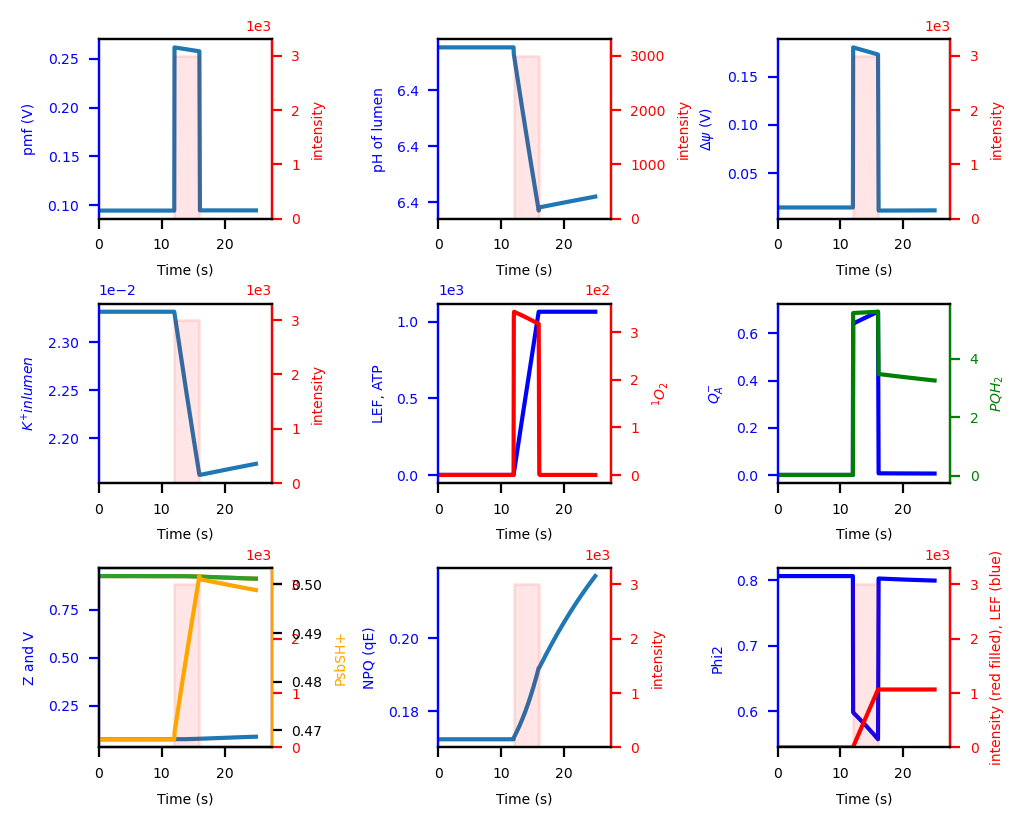

In [6]:
# generate a dictionary to hold the results of the simulations.
output_dict = {}
constants_dict = {}
starting_conditions_dict = {}



light = dpp.generate_square_wave_based_light_sequence(
                    baseline_duration=10,
                    baseline_intensity=0,
                    rise_time=0,
                    pulse_duration=3,
                    pulse_intensity=3000,
                    recovery_duration=10,
                    recovery_intensity=0,
                    point_frequency=1,
                    repeat_cycles=1,
                    time_units='seconds',
                    )

on = 'Test'

# generate simulation constants
Kx = dpp.sim_constants()
Kx.k_KEA = 0
Kx.fraction_pH_effect = 0.25

constants_dict[on] = Kx

output_dict[on], starting_conditions_dict[on] = dpp.sim(Kx, original_dark_equilibrated_initial_y, 
                                                        light,
                                                        dpp.max_light_change, dpp.points_per_segment, 
                                                        dark_equilibration = 60*60)

dpp.plot_interesting_stuff('Test', output_dict[on])

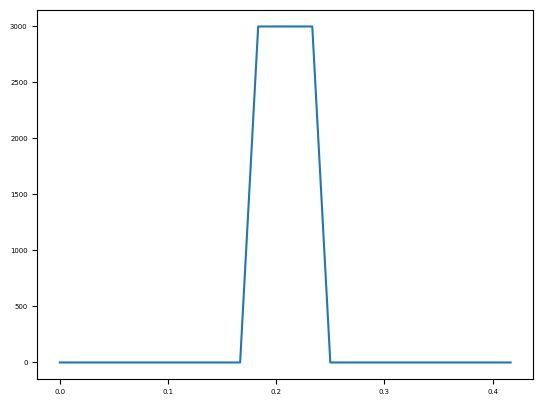

In [7]:
plt.figure()
plt.plot(light[0]/60, light[1])
plt.show()

In [8]:
output_dict['Test'].keys()

dict_keys(['QA', 'QAm', 'PQ', 'PQH2', 'Hin', 'pHlumen', 'Dy', 'pmf', 'DeltaGatp', 'Klumen', 'Kstroma', 'ATP_made', 'PC_ox', 'PC_red', 'P700_ox', 'P700_red', 'Z_array', 'V_array', 'NPQ_array', 'singletO2_array', 'Phi2_array', 'LEF_array', 'Fd_ox', 'Fd_red', 'ATP_pool', 'ADP_pool', 'NADPH_pool', 'NADP_pool', 'PhiNPQ', 'PhiNO', 'delta_pH', 'delta_pH_V', 'delta_pH_offset', 'delta_pH_V_offset', 'pmf_offset', 'Dy_offset', 'pmf_total', 'singletO2_rate', 'time_axis', 'time_axis_min', 'time_axis_h', 'end_state', 'light_curve', 'integrated_light', 'fraction_Dy', 'fraction_DpH', 'Z', 'V', 'NPQ', 'singletO2', 'Phi2', 'LEF', 'LEF_productive', 'LEF_to_NADPH', 'LEF_cumulative', 'normalized_LEF_cumulative', 'ATP_rate', 'NADPH', 'PsbS_protonated', 'b6f_control', 'Fd_rate', 'ATP/NADPH', 'K_flux', 'deficit', 'deficit_int', 'fract_deficit'])

In [9]:
output_dict['Test']['NPQ']

array([0.17229868, 0.17229868, 0.17229868, 0.17229867, 0.17229867,
       0.17229867, 0.17229867, 0.17229867, 0.17229866, 0.17229866,
       0.17229866, 0.17229866, 0.17229865, 0.17229865, 0.17229865,
       0.17229865, 0.17229865, 0.17229864, 0.17229864, 0.17229864,
       0.17229864, 0.17229864, 0.17229863, 0.17229863, 0.17229863,
       0.17229863, 0.17229863, 0.17229862, 0.17229862, 0.17229862,
       0.17229862, 0.17229862, 0.17229861, 0.17229861, 0.17229861,
       0.17229861, 0.1722986 , 0.1722986 , 0.1722986 , 0.1722986 ,
       0.1722986 , 0.17229859, 0.17229859, 0.17229859, 0.17229859,
       0.17229859, 0.17229858, 0.17229858, 0.17229858, 0.17229858,
       0.17229858, 0.17229857, 0.17229857, 0.17229857, 0.17229857,
       0.17229857, 0.17229856, 0.17229856, 0.17229856, 0.17229856,
       0.17229855, 0.17229855, 0.17229855, 0.17229855, 0.17229855,
       0.17229854, 0.17229854, 0.17229854, 0.17229854, 0.17229854,
       0.17229853, 0.17229853, 0.17229853, 0.17229853, 0.17229

In [10]:
output_dict['Test']['NPQ'] + output_dict['Test']['Phi2']

array([0.97860129, 0.97860129, 0.97860129, 0.97860129, 0.97860128,
       0.97860128, 0.97860128, 0.97860128, 0.97860128, 0.97860128,
       0.97860127, 0.97860127, 0.97860127, 0.97860127, 0.97860127,
       0.97860127, 0.97860126, 0.97860126, 0.97860126, 0.97860126,
       0.97860126, 0.97860125, 0.97860125, 0.97860125, 0.97860125,
       0.97860125, 0.97860125, 0.97860124, 0.97860124, 0.97860124,
       0.97860124, 0.97860124, 0.97860124, 0.97860123, 0.97860123,
       0.97860123, 0.97860123, 0.97860123, 0.97860122, 0.97860122,
       0.97860122, 0.97860122, 0.97860122, 0.97860122, 0.97860121,
       0.97860121, 0.97860121, 0.97860121, 0.97860121, 0.97860121,
       0.9786012 , 0.9786012 , 0.9786012 , 0.9786012 , 0.9786012 ,
       0.97860119, 0.97860119, 0.97860119, 0.97860119, 0.97860119,
       0.97860119, 0.97860118, 0.97860118, 0.97860118, 0.97860118,
       0.97860118, 0.97860118, 0.97860117, 0.97860117, 0.97860117,
       0.97860117, 0.97860117, 0.97860116, 0.97860116, 0.97860

In [11]:
dpp.points_per_segment

100

In [12]:
len(output_dict['Test']['NPQ'])

300